In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Data loaded successfully.")
df.head()
print(df.describe())

Saving Salary.csv to Salary (1).csv
Data loaded successfully.
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


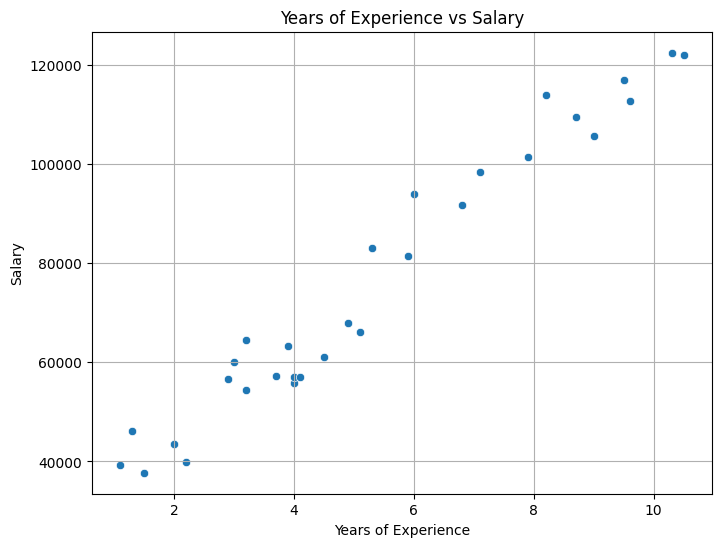

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="YearsExperience", y="Salary", data=df)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

In [6]:
X = df[["YearsExperience"]]  # Feature
y = df["Salary"]             # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 49830096.85590839
R² Score: 0.9024461774180497


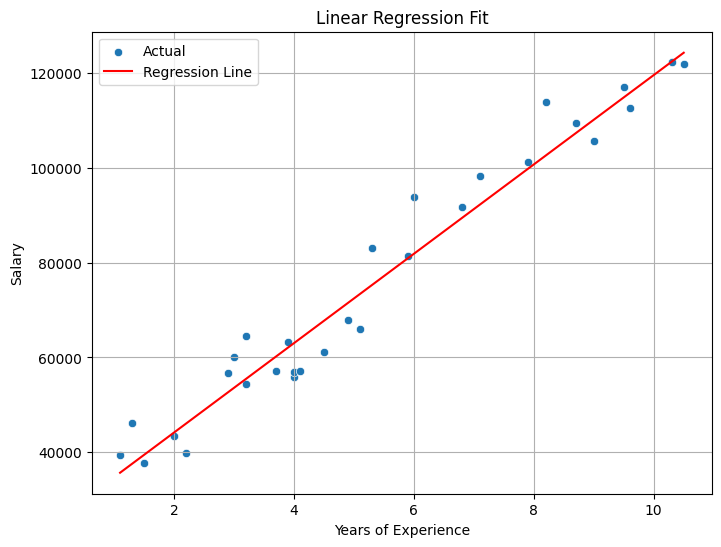

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X["YearsExperience"], y=y, label="Actual")
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title("Linear Regression Fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
exp = float(input("Enter your Years of Experience: "))
input_df = pd.DataFrame({'YearsExperience': [exp]})
pred_salary = model.predict(input_df)
print(f"Predicted Salary for {exp} years of experience: ₹{pred_salary[0]:,.2f}")

Enter your Years of Experience: 6
Predicted Salary for 6.0 years of experience: ₹81,864.47


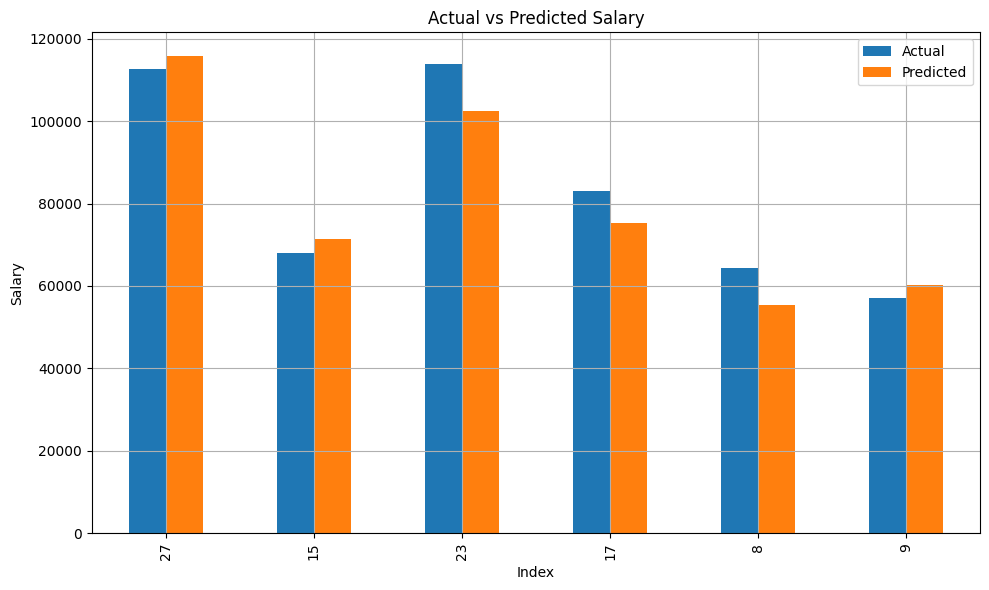

In [13]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df.plot(kind='bar', figsize=(10,6))
plt.title("Actual vs Predicted Salary")
plt.xlabel("Index")
plt.ylabel("Salary")
plt.tight_layout()
plt.grid(True)
plt.show()